<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/MFNN_in_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using NN in Machine Learning Tasks

1. Images -- Image classification

2. Videos

3. Text

4. Sounds

We can also apply MFNN in Regression and classification

**Applying a Multi-Feed Neural Network (MFNN) for Regression**

A Multi-Feed Neural Network (MFNN) is simply a neural architecture where multiple inputs (or input representations) are fed into the model through separate branches, processed independently, and then merged before prediction.

This is extremely useful in regression tasks when your dataset contains heterogeneous inputs, such as:

Numeric features

Categorical embeddings

Engineered features

Image + tabular

Time-series + static data

The MFNN allows you to build specialized sub-networks for each input.

Input A → Dense layers → Feature Vector A

Input B → Dense layers → Feature Vector B

Input C → Dense layers → Feature Vector C

Merged Vector → Regression Head → Output


Predict house prices using:

Numerical features → (Area, Bedrooms, Age, Distance to metro…)

Categorical features → (City, Zone)

Neighbourhood statistics → (crime index, greenery score)

Each group is very different → MFNN is ideal.

**Implement MFNN in regression using California Housing Dataset**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = pd.read_csv("/content/mydata.xls")

data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, Model

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

df = pd.read_csv("/content/mydata.xls")

# Separate features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Show first few rows
X.head()


Shape of X: (20640, 8)
Shape of y: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 3. Feature Grouping for Multi-Feed Architecture

We will create **three logical feature groups**:

### 🧩 Group A – Socioeconomic / House Internals
- `MedInc`   (Median income)
- `AveRooms` (Average rooms)
- `AveBedrms` (Average bedrooms)
- `AveOccup` (Average occupants per household)

These features describe economic strength and internal house attributes.

---

### 📍 Group B – Location Features
- `Latitude`
- `Longitude`

Location has a strong, non-linear relationship with house prices and deserves its own branch.

---

### 👥 Group C – Demographic / Age Features
- `HouseAge`
- `Population`

These features describe age of homes and area population.


In [ ]:
# Define feature groups
group_a = X[["MedInc", "AveRooms", "AveBedrms", "AveOccup"]] #list of lists: selecting relevant columns from dataframe
group_b = X[["Latitude", "Longitude"]]
group_c = X[["HouseAge", "Population"]]

print("Group A shape:", group_a.shape)
print("Group B shape:", group_b.shape)
print("Group C shape:", group_c.shape)


Group A shape: (20640, 4)
Group B shape: (20640, 2)
Group C shape: (20640, 2)


## 4. Train–Test Split and Scaling

We will:
- Split into **train** and **test** sets (80/20)
- Use **separate scalers** for each feature group  
  (because they go into different branches of the network)

Note: Scaling is important for neural networks to train stably.


In [ ]:
# Train-test split for all groups simultaneously
(
    X_train_a, X_test_a,
    X_train_b, X_test_b,
    X_train_c, X_test_c,
    y_train, y_test
) = train_test_split(
    group_a, group_b, group_c, y,
    test_size=0.2,
    random_state=42
)

# Initialize scalers for each group
scaler_a = StandardScaler()
scaler_b = StandardScaler()
scaler_c = StandardScaler()

# Fit on train, transform train & test
X_train_a = scaler_a.fit_transform(X_train_a)
X_test_a = scaler_a.transform(X_test_a)

X_train_b = scaler_b.fit_transform(X_train_b)
X_test_b = scaler_b.transform(X_test_b)

X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# Convert targets to numpy arrays
y_train = y_train.values
y_test = y_test.values

print("Train shapes:", X_train_a.shape, X_train_b.shape, X_train_c.shape, y_train.shape)
print("Test shapes:", X_test_a.shape, X_test_b.shape, X_test_c.shape, y_test.shape)


Train shapes: (16512, 4) (16512, 2) (16512, 2) (16512,)
Test shapes: (4128, 4) (4128, 2) (4128, 2) (4128,)


## 5. Build the Multi-Feed Neural Network (MFNN)

We will design **three branches**:

### 🔹 Branch A – Socioeconomic / House Internals
- Input size: 4
- Dense(64) → Dense(32)

### 🔹 Branch B – Location Features
- Input size: 2
- Dense(32) → Dense(16)

### 🔹 Branch C – Demographic / Age Features
- Input size: 2
- Dense(32) → Dense(16)

Then we will:
- Concatenate all three branch outputs
- Add two more Dense layers
- Output a single neuron for **regression** (house value)

This structure allows each feature group to learn its own representation before joining forces.


In [ ]:
# ----- Branch A: Socioeconomic / Internals -----
input_a = layers.Input(shape=(4,), name="socioeconomic_input") #input layer
a = layers.Dense(64, activation="relu", name="a_dense_1")(input_a) #first hidden layer
a = layers.Dense(32, activation="relu", name="a_dense_2")(a) #second hidden layer

# ----- Branch B: Location -----
input_b = layers.Input(shape=(2,), name="location_input")
b = layers.Dense(32, activation="relu", name="b_dense_1")(input_b)
b = layers.Dense(16, activation="relu", name="b_dense_2")(b)

# ----- Branch C: Demographic / Age -----
input_c = layers.Input(shape=(2,), name="demographic_input")
c = layers.Dense(32, activation="relu", name="c_dense_1")(input_c)
c = layers.Dense(16, activation="relu", name="c_dense_2")(c)

# ----- Merge Branches -----
merged = layers.concatenate([a, b, c], name="concatenated_features")

# Higher-level combined representation
z = layers.Dense(64, activation="relu", name="combined_dense_1")(merged)
z = layers.Dense(32, activation="relu", name="combined_dense_2")(z)

# Output layer for regression (no activation)
output = layers.Dense(1, name="price_output")(z) #final hidden layer: Output layer

# Build the model
model = Model(inputs=[input_a, input_b, input_c], outputs=output, name="MFNN_California_Housing")

# Compile the model
model.compile(
    optimizer="adam",
    loss="mse",          # Mean Squared Error for regression
    metrics=["mae"]      # Mean Absolute Error for interpretability
)

# Show model summary
model.summary()

Model: "MFNN_California_Housing"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ socioeconomic_input │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ location_input      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ demographic_input   │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ a_dense_1 (Dense)   │ (None, 64)        │        320 │ socioeconomic_in… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ b_dense_1 (Dense)   │ (None, 32)        │         96 │ location_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ c_dense_1 (Dense)   │ (None, 32)        │         96 │ demographic_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ a_dense_2 (Dense)   │ (None, 32)        │      2,080 │ a_dense_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ b_dense_2 (Dense)   │ (None, 16)        │        528 │ b_dense_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ c_dense_2 (Dense)   │ (None, 16)        │        528 │ c_dense_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_featu… │ (None, 64)        │          0 │ a_dense_2[0][0],  │
│ (Concatenate)       │                   │            │ b_dense_2[0][0],  │
│                     │                   │            │ c_dense_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_dense_1    │ (None, 64)        │      4,160 │ concatenated_fea… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_dense_2    │ (None, 32)        │      2,080 │ combined_dense_1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price_output        │ (None, 1)         │         33 │ combined_dense_2… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,921 (38.75 KB)

 Trainable params: 9,921 (38.75 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Train the Model

We train using:
- `optimizer='adam'`
- `loss='mse'`
- `metrics=['mae']`
- `validation_split=0.2` (from the training set)

We also store the training history to visualize learning curves.


In [ ]:
history = model.fit(
    {
        "socioeconomic_input": X_train_a,
        "location_input": X_train_b,
        "demographic_input": X_train_c
    },
    y_train,
    epochs=50, #HP
    batch_size=64,#default is 32
    validation_split=0.2, #additional testing: hypertuning
    verbose=1
)


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.8627 - mae: 0.9821 - val_loss: 0.4445 - val_mae: 0.4824
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3936 - mae: 0.4473 - val_loss: 0.3759 - val_mae: 0.4447
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3418 - mae: 0.4118 - val_loss: 0.3512 - val_mae: 0.4280
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3192 - mae: 0.3945 - val_loss: 0.3333 - val_mae: 0.4137
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3041 - mae: 0.3817 - val_loss: 0.3195 - val_mae: 0.4021
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2943 - mae: 0.3727 - val_loss: 0.3103 - val_mae: 0.3962
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2868 - mae: 0.3664 - val_loss: 0.3064 - val_mae: 0.3932
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2823 - mae: 0.3625 - val_loss: 0.3020 - val_mae: 0.3902
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

Evaluate the Model on Test Data

We now evaluate the model on the **held-out test set** that was not used in training or validation.
We'll compute:
- MSE
- RMSE
- MAE
- R² Score

In [ ]:
# Evaluate using built-in Keras metrics
test_loss, test_mae = model.evaluate(
    {
        "socioeconomic_input": X_test_a,
        "location_input": X_test_b,
        "demographic_input": X_test_c
    },
    y_test,#actual values
    verbose=0
)

# Get predictions
y_pred = model.predict(
    {
        "socioeconomic_input": X_test_a,
        "location_input": X_test_b,
        "demographic_input": X_test_c
    }
).flatten() #converts 2d array into single dimension

# Additional metrics using sklearn
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_sk = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE  (Keras): {test_loss:.4f}")
print(f"Test MAE  (Keras): {test_mae:.4f}")
print(f"Test RMSE (sklearn): {rmse:.4f}")
print(f"Test MAE  (sklearn): {mae_sk:.4f}")
print(f"Test R²   (sklearn): {r2:.4f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MSE  (Keras): 0.2529
Test MAE  (Keras): 0.3378
Test RMSE (sklearn): 0.5029
Test MAE  (sklearn): 0.3378
Test R²   (sklearn): 0.8070


Predicted vs Actual Values

A scatter plot of **Actual vs Predicted** values gives a quick visual sense of how well the model is performing.

- If the model is perfect → points lie on the diagonal line `y = x`.
- The more tightly clustered around the diagonal, the better.

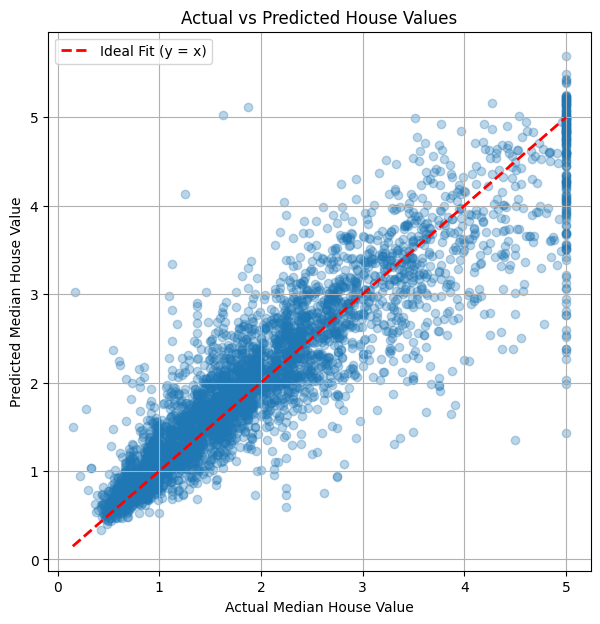

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal Fit (y = x)")

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.legend()
plt.grid(True)
plt.show()
